## Name : PATEL CHINTAN

Assignment : In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.
    

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
sns.set()

In [8]:
data = datasets.load_iris()

In [10]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
columns = data.feature_names

In [25]:
df = pd.DataFrame()
df["target"] = data['target']
feature = data["data"]

In [32]:
feature_df = pd.DataFrame(feature , columns = columns)
df = df.join(feature_df,how='left' )

In [33]:
df.head()

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [34]:
df["target_name"] = df["target"].map({0:'setosa' , 1:'versicolor' , 2:'virginica'})

In [35]:
df.head()

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,0,5.1,3.5,1.4,0.2,setosa
1,0,4.9,3.0,1.4,0.2,setosa
2,0,4.7,3.2,1.3,0.2,setosa
3,0,4.6,3.1,1.5,0.2,setosa
4,0,5.0,3.6,1.4,0.2,setosa


In [37]:
df.columns

Index(['target', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target_name'],
      dtype='object')

In [40]:
df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)','target', 'target_name']]

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Transfer to 3Dimention

In [42]:
features = df.drop(["target","target_name"] , axis = 1)

In [44]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
features_3D = pca.fit_transform(features)

In [49]:
features_3D = pd.DataFrame(features_3D , columns = ["PC1","PC2","PC3"])

In [51]:
features_3D.head()

,PC1,PC2,PC3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [52]:
final_data = features_3D.join(df[["target_name"]] , how = "left")

In [53]:
final_data.count()

PC1            150
PC2            150
PC3            150
target_name    150
dtype: int64

### Plotting Dataset

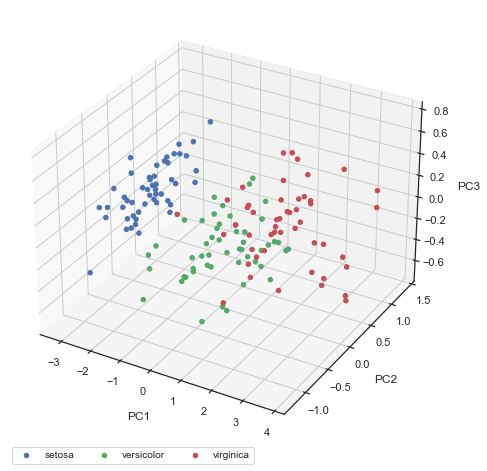

In [92]:
sns.set_style("white")
fig = plt.figure(figsize = (10,8))
colors=['b', 'g', 'r']
ax = plt.subplot(111, projection='3d')
for k,i in enumerate(final_data["target_name"].unique()):
    data = final_data[final_data["target_name"] == i]
    ax.scatter(data["PC1"],data["PC2"],data["PC3"],color=colors[k],label = i,alpha = 1)
ax.set_xlabel("PC1", labelpad= 10)
ax.set_ylabel("PC2", labelpad= 10)
ax.set_zlabel("PC3", labelpad= 10)
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=10, bbox_to_anchor=(0, 0))
plt.show()